## Naive Bayes for Titanic Dataset


Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

change path as required


In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA and Plotting some graphs

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [7]:
data.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [8]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


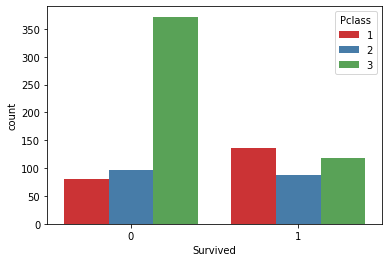

In [9]:
sns.countplot( x='Survived', data=data, hue="Pclass", palette="Set1");

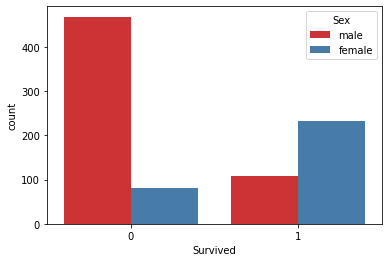

In [10]:
sns.countplot( x='Survived', data=data, hue="Sex", palette="Set1");

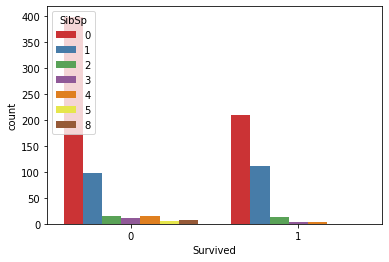

In [11]:
sns.countplot( x='Survived', data=data, hue="SibSp", palette="Set1");

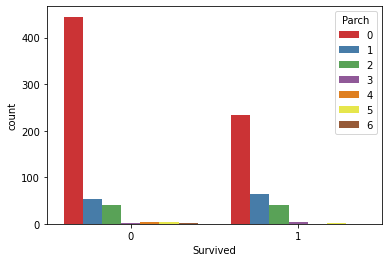

In [12]:
sns.countplot( x='Survived', data=data, hue="Parch", palette="Set1");

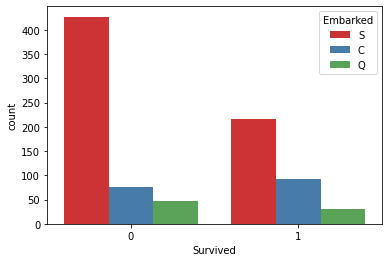

In [13]:
sns.countplot( x='Survived', data=data, hue="Embarked", palette="Set1");

## Correlation Matrix

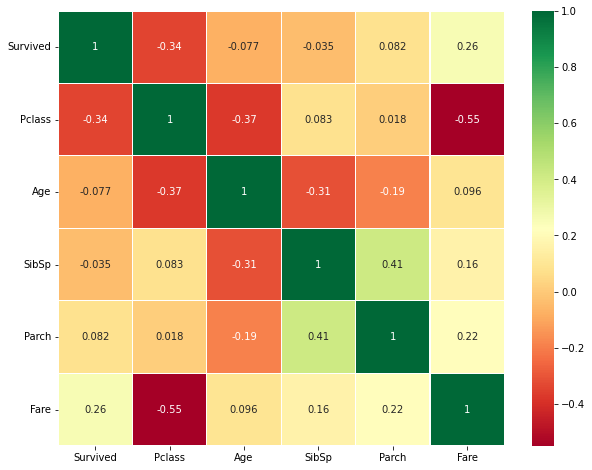

In [14]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [15]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [16]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
df_train=data
df_test=pd.read_csv('/content/test.csv')
#data.Age.astype('int64')
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
df_train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

# Changing Data to categorical
We will change the continuos data of age in categories to make less fields for naive bayes

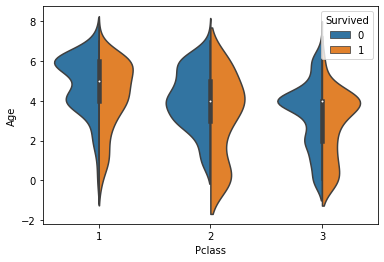

In [39]:
sexos={"male":0, "female":1}
#df_train.Sex=[sexos[item] for item in df_train.Sex]
#df_test.Sex=[sexos[item] for item in df_test.Sex]

df_train.Age.fillna(df_train.Age.mean(), inplace=True)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)

df_train.Age=df_train.Age.astype(int)
df_test.Age=df_test.Age.astype(int)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, split=True)


data = [df_train, df_test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

Calculating Probabnility for each class for naive bayes

In [23]:
Class_counts=df_train['Pclass'].value_counts()  
p_Class=Class_counts/len(df_train)

Sex_counts=df_train['Sex'].value_counts()
p_Sex=Sex_counts/len(df_train)

Age_counts=df_train['Age'].value_counts()
p_Age=Age_counts/len(df_train)


y_counts=df_train['Survived'].value_counts()
p_y=y_counts/len(df_train)

df_survived=df_train.loc[df_train['Survived'] == 1]
df_died=df_train.loc[df_train['Survived'] == 0]


class_survived_counts=df_survived['Pclass'].value_counts()  
p_class_survived=class_survived_counts/len(df_survived)

class_died_counts=df_died['Pclass'].value_counts()  
p_class_died=class_died_counts/len(df_died)


sex_survived_counts=df_survived['Sex'].value_counts()  
p_sex_survived=sex_survived_counts/len(df_survived)

sex_died_counts=df_died['Sex'].value_counts()  
p_sex_died=sex_died_counts/len(df_died)


age_survived_counts=df_survived['Age'].value_counts()  
p_age_survived=age_survived_counts/len(df_survived)

age_died_counts=df_died['Age'].value_counts()  
p_age_died=age_died_counts/len(df_died)

Defining Naive bayes function

In [24]:
def Bayes(py, px1y, px2y, px3y, px1, px2, px3):
    numerator=px1y*px2y*px3y*py
    denominator=px1*px2*px3
    p=numerator/denominator
    return p

Dropping columns that we will not be using.
These items are dropped as they are mostly unique for each field

In [25]:
df_test.drop(["Cabin","Name","Ticket"],axis=1,inplace=True)


Making a result array and predicting values of test dataset

In [26]:
result_array=[]

for i in range(0,418):
    feature_class=df_test.iloc[i]['Pclass']
    feature_sex=df_test.iloc[i]['Sex']
    feature_age=df_test.iloc[i]['Age']
    
    P_Y1=Bayes(p_y[1], p_class_survived[feature_class], p_sex_survived[feature_sex], p_age_survived[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    P_Y0=Bayes(p_y[0], p_class_died[feature_class], p_sex_died[feature_sex], p_age_died[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    
    if P_Y0 > P_Y1:
        result=0
    else:
        result=1
        
    result_array.append(result)


output = pd.DataFrame({'PassengerId': df_test.PassengerId,'Survived': result_array})

In [27]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
actual=pd.read_csv('/content/gender_submission.csv')

## Attempt at KNN from scratch. 
I wasn't able to finish it from scratch and didn't use inbuilt libraries for kNN. Still leaving the initial commit

In [31]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2)**2))


vec1 = np.array([3, 0])
vec2 = np.array([0, 4])


euclidean_distance(vec1, vec2)

5.0

In [33]:
def get_nearest_neighbor(vector, dataset, number_of_vectors=1, ignore_cols=['Survived'], not_count_duplicates=False):
    ds = dataset.copy()
    ds['distance'] = ds.loc[:, ~ds.columns.isin(ignore_cols)].apply(
        lambda x: euclidean_distance(x, vector), axis=1)
    if not_count_duplicates:
        distances = sorted(ds.distance.unique())[:number_of_vectors]
        return ds.loc[ds.distance <= max(distances)].drop('distance', axis=1)
    return ds.sort_values('distance', ascending=True).head(number_of_vectors).drop('distance', axis=1)
        

dataset = pd.DataFrame([
    {'a': 1, 'b': 1, 'Survived': 1},
    {'a': 2, 'b': 2, 'Survived': 1},
    {'a': 3, 'b': 3, 'Survived': 0},
    {'a': 4, 'b': 4, 'Survived': 0},
    {'a': 5, 'b': 5, 'Survived': 0},
])
vector = pd.Series({'a': 2.5, 'b': 2.5})


get_nearest_neighbor(vector, dataset)

,a,b,Survived
1,2,2,1


In [34]:
def predict(vector, dataset, number_of_neighbors=1, y='Survived'):
    neighbors = get_nearest_neighbor(vector, dataset, number_of_neighbors)
    return round(neighbors[y].mean())


print(predict(vector, dataset))
print(predict(pd.Series({'a': 4.5, 'b': 4.5}), dataset))

1
0


In [35]:
selected= ['PClass', 'Sex','Age']

In [36]:
def predict_dataset(dataset, number_of_neighbors=1):
    ds = dataset.copy()
    def predict_row(vector, dataset):
        subset = dataset.loc[~(dataset.index==vector.name)]
        if vector.name % 100 == 0:
            print(vector.name)
        return int(predict(vector, subset, number_of_neighbors))

    ds['predicted'] = ds.loc[:, ds.columns.isin(selected)].apply(
        lambda x: predict_row(x, ds), axis=1)
    
    return ds

ds = predict_dataset(df_train, number_of_neighbors=3)

print('Accuracy:', sum(ds['Survived'] == ds['predicted']) / len(ds))

0


KeyboardInterrupt: ignored